<a href="https://colab.research.google.com/github/yogi2034/Deep-Learning/blob/main/002pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sklearn


In [2]:
from sklearn.datasets import make_circles
n_samples = 1000

X,y =make_circles(n_samples,
                  noise=0.03,
                  random_state=42)

In [3]:
len(X),len(y)

(1000, 1000)

In [4]:
X[:5],y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [5]:
import pandas as pd
circles =pd.DataFrame({"X1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


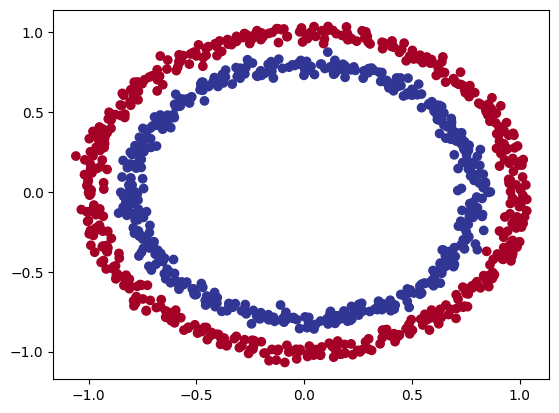

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [7]:
X.shape,y.shape

((1000, 2), (1000,))

In [8]:
X_sample=X[0]
y_sample=y[0]

print(f"Values for one sample of X:{X_sample} and the same for y:{y_sample}")
print(f"Values for one sample of X:{X_sample.shape} and the same for y:{y_sample.shape}")

Values for one sample of X:[0.75424625 0.23148074] and the same for y:1
Values for one sample of X:(2,) and the same for y:()


## Data to Tensor

In [9]:
import torch
torch.__version__

'2.6.0+cu124'

In [10]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [11]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [13]:
len(X_train),len(y_test)

(800, 200)

# Building a model

In [14]:
from torch import nn


device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    # self.layer_1=nn.Linear(in_features=2,out_features=5)
    # self.layer_2=nn.Linear(in_features= 5,out_features=1)

    self.two_linear_layers=nn.Sequential(
        nn.Linear(in_features=2,out_features=5),
        nn.Linear(in_features=5,out_features=1)
    )
  def  forward(self,x):
    # return self.layer_2(self.layer_1(x))
    return self.two_linear_layers(x)
model_0=CircleModel().to(device)
model_0

CircleModel(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [16]:
next(model_0.parameters()).device

device(type='cpu')

In [17]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4121, -0.2635],
                      [ 0.0805, -0.5905],
                      [-0.1247,  0.5111],
                      [ 0.4455, -0.0442],
                      [-0.3357, -0.6751]])),
             ('0.bias', tensor([ 0.5894,  0.1882, -0.6583,  0.3670, -0.2817])),
             ('1.weight',
              tensor([[-0.3690,  0.0466, -0.1495,  0.0981, -0.1727]])),
             ('1.bias', tensor([-0.3735]))])

In [19]:
untrained_preds=model_0(X_test.to(device))
len(untrained_preds),untrained_preds.shape,len(X_test),X_test.shape,untrained_preds[:10],y_test[:10]

(200,
 torch.Size([200, 1]),
 200,
 torch.Size([200, 2]),
 tensor([[-0.3165],
         [-0.2982],
         [-0.4127],
         [-0.2891],
         [-0.4889],
         [-0.4771],
         [-0.3650],
         [-0.4071],
         [-0.4093],
         [-0.2978]], grad_fn=<SliceBackward0>),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

Setup loss and optim

In [20]:
# loss_fn=nn.BCELoss()
# nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )
loss_fn=nn.BCEWithLogitsLoss()

optimizer =torch.optim.SGD(params=model_0.parameters(),lr=0.2)

In [21]:
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred))*100
  return acc

Train Model

In [22]:
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3165],
        [-0.2982],
        [-0.4127],
        [-0.2891],
        [-0.4889]])

In [23]:
y_preds_probs=torch.sigmoid(y_logits)
y_preds_probs,torch.round(y_preds_probs)

(tensor([[0.4215],
         [0.4260],
         [0.3983],
         [0.4282],
         [0.3801]]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

In [24]:
y_preds=torch.round(y_preds_probs)
y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))))[:5]
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

Train and Test loop

In [25]:
device

'cpu'

In [26]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [27]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

epochs=1000

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model_0.train()
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))

    loss=loss_fn(y_logits,
                y_train)
    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits=model_0(X_test).squeeze()
        test_preds=torch.round(torch.sigmoid(test_logits))

        test_loss=loss_fn(test_logits,y_test)
        test_acc=accuracy_fn(y_true=y_test,
                            y_pred=test_preds)
    if epoch%100==0:
        print(f"Epoch:{epoch}|Loss:{loss}||acc:{acc}|Test loss:{test_loss:.5f},test acc:{test_acc}")

Epoch:0|Loss:0.7131941914558411||acc:50.0|Test loss:0.71050,test acc:50.0
Epoch:100|Loss:0.6930062770843506||acc:50.875|Test loss:0.69485,test acc:46.0
Epoch:200|Loss:0.6929826140403748||acc:51.37500000000001|Test loss:0.69475,test acc:47.0
Epoch:300|Loss:0.692980170249939||acc:51.0|Test loss:0.69470,test acc:45.5
Epoch:400|Loss:0.6929798722267151||acc:51.24999999999999|Test loss:0.69469,test acc:46.0
Epoch:500|Loss:0.6929798126220703||acc:51.125|Test loss:0.69468,test acc:46.0
Epoch:600|Loss:0.6929798126220703||acc:51.125|Test loss:0.69468,test acc:46.0
Epoch:700|Loss:0.6929798722267151||acc:51.125|Test loss:0.69468,test acc:46.0
Epoch:800|Loss:0.6929798722267151||acc:51.0|Test loss:0.69468,test acc:46.0
Epoch:900|Loss:0.6929798722267151||acc:51.0|Test loss:0.69468,test acc:46.0


In [28]:
# loss_fn
loss_fn_without_logits=nn.BCELoss()
loss_fn_without_logits

BCELoss()

In [29]:
circles.label.value_counts()

,count
label,
1,500
0,500


predict and evaluate

In [30]:
import requests
from pathlib import Path
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Download helper functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper functions.py


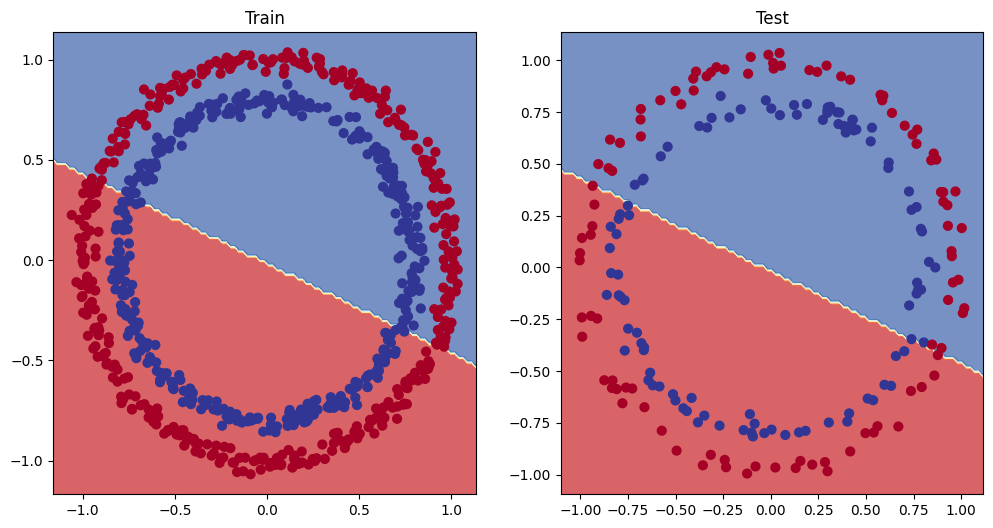

In [31]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


Improve a model

In [32]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4407, -0.2701],
                      [ 0.0732, -0.5886],
                      [-0.0979,  0.5041],
                      [ 0.4306, -0.0403],
                      [-0.3135, -0.6807]])),
             ('0.bias', tensor([ 0.5236,  0.2019, -0.7032,  0.3945, -0.3232])),
             ('1.weight',
              tensor([[-0.3022,  0.0650, -0.2673,  0.1322, -0.2194]])),
             ('1.bias', tensor([-0.1650]))])

In [33]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
  def forward(self,x):
    # z=self.layer_1(x)
    # z=self.layer_2(z)
    # z=self.layer_3(z)
    # return z
    return self.layer_3(self.layer_2(self.layer_1(x)))
model_1=CircleModelV1

In [34]:
model_1=CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [35]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [36]:
loss_fn=nn.BCEWithLogitsLoss()
optimier=torch.optim.SGD(params=model_1.parameters(),lr=0.1)


In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1000
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)


for epoch in range(epochs):
  model_1.train()
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()

  optimizer.step()


  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)
  if epoch%100==0:
    print( f"epoch:{epoch}|Loss:{loss}|acc{acc}|test loss:{test_loss}|test acc:{test_acc}")


epoch:0|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:100|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:200|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:300|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:400|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:500|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:600|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:700|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:800|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0
epoch:900|Loss:0.6939550638198853|acc50.875|test loss:0.6926102638244629|test acc:51.0


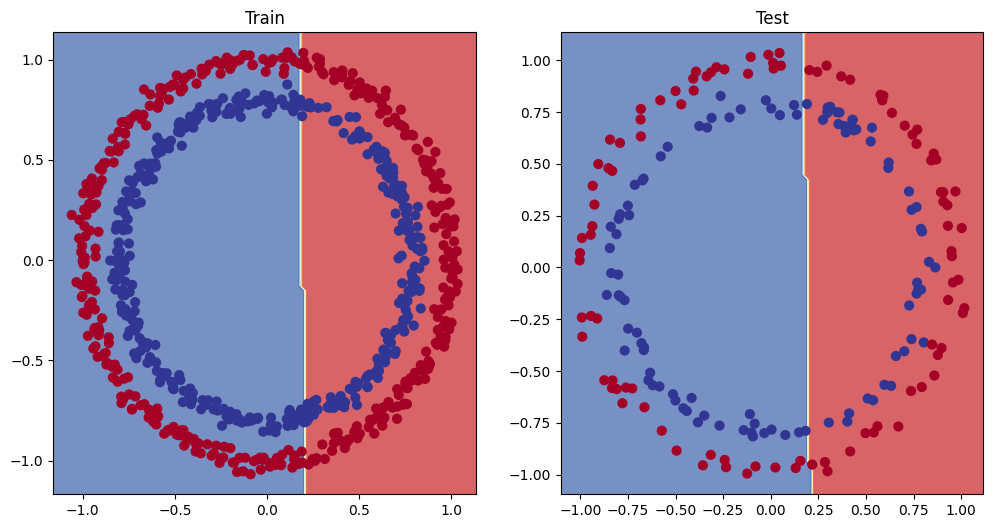

In [38]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)


Prepare data to see if our model can fit a straight line

In [39]:
from os import XATTR_REPLACE
w=0.7
b=.3
X_regression=torch.arange(0,1,0.01).unsqueeze(1)
y_regression =w*X_regression +b

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [40]:
train_split=int(0.8*len(X_regression))
X_train_regression,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression=X_regression[train_split:],y_regression[train_split:]
len(X_train_regression),len(X_test_regression)


(80, 20)

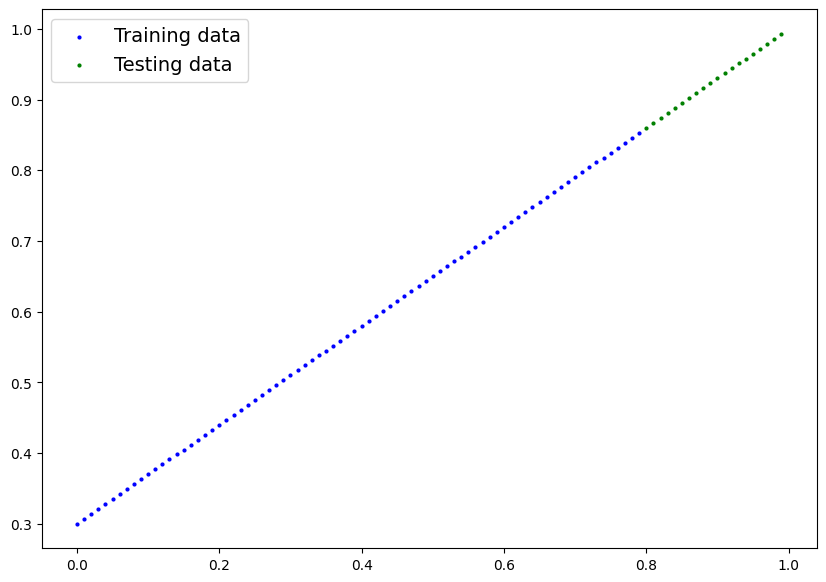

In [41]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

In [42]:
model_2=nn.Sequential(
      nn.Linear(in_features=1,out_features=10),
      nn.Linear(in_features=10,out_features=10),
      nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [43]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters()
                ,lr=0.1)

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs=1300
X_train_regression,y_train_regression=X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression=X_test_regression.to(device),y_test_regression.to(device)

In [45]:
for epoch in range(epochs):
  y_preds=model_2(X_train_regression)
  loss=loss_fn(y_preds,y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(X_test_regression)
    test_loss=loss_fn(test_pred,y_test_regression)
  if epoch%100==0:
    print( f"epoch:{epoch}|Loss:{loss}||test loss:{test_loss}|")


epoch:0|Loss:0.7598584890365601||test loss:0.541427731513977|
epoch:100|Loss:0.09308688342571259||test loss:0.029011687263846397|
epoch:200|Loss:0.07375653088092804||test loss:0.0285003874450922|
epoch:300|Loss:0.06745065003633499||test loss:0.006151747889816761|
epoch:400|Loss:0.061067402362823486||test loss:0.02003960870206356|
epoch:500|Loss:0.05698258802294731||test loss:0.010608142241835594|
epoch:600|Loss:0.04856746271252632||test loss:0.013261008076369762|
epoch:700|Loss:0.06108739972114563||test loss:0.021269220858812332|
epoch:800|Loss:0.05599532648921013||test loss:0.01425432600080967|
epoch:900|Loss:0.055713314563035965||test loss:0.006033414509147406|
epoch:1000|Loss:0.06454724073410034||test loss:0.024250250309705734|
epoch:1100|Loss:0.05295724421739578||test loss:0.00773464422672987|
epoch:1200|Loss:0.052969176322221756||test loss:0.006133425049483776|


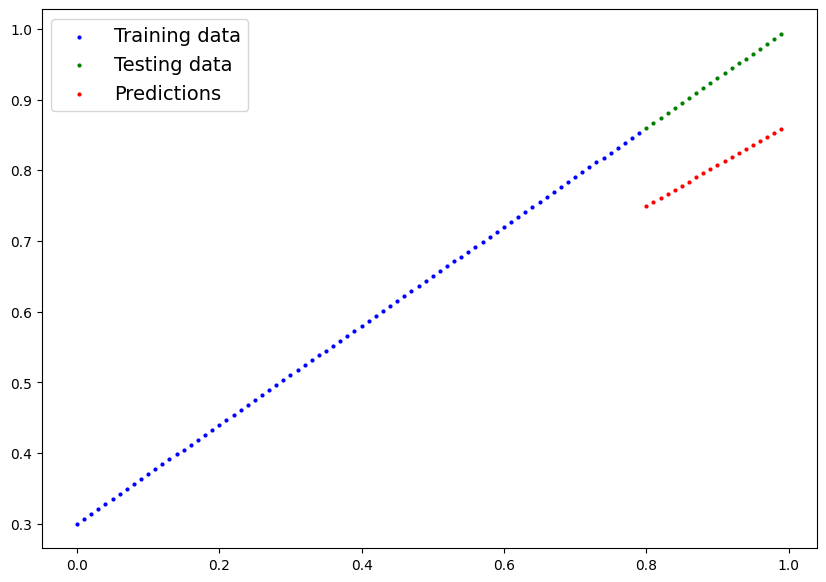

In [46]:
model_2.eval()

with torch.inference_mode():
  y_preds=model_2(X_test_regression)

# plot_predictions(train_data=X_train_regression,
#                  train_labels=y_train_regression,
#                  test_data=X_test_regression,
#                  test_labels=y_test_regression,
#                  predictions=y_preds)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Non-Linearity

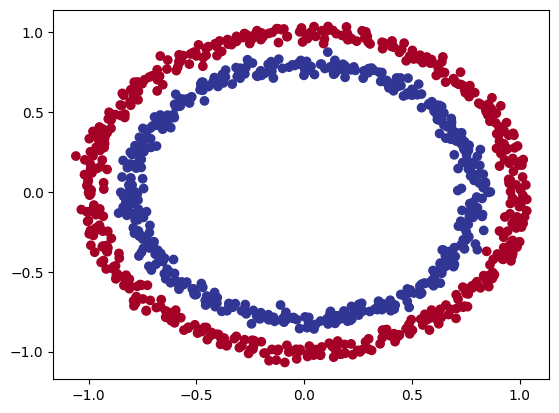

In [47]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000

X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [48]:
import torch

from sklearn.model_selection import train_test_split
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [49]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_3=CircleModelV2().to(device)
model_3



CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [50]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(model_3.parameters(),lr=0.1)


In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

epochs=1000
for epoch in range(epochs):
  # model_3.train()
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,y_test)

    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)
  if epoch%100==0:
    print(f"Epoch:{epoch}|Loss:{loss}|Acc:{acc}|test loss:{test_loss},Test_acc:{test_acc}")

Epoch:0|Loss:0.6929463148117065|Acc:50.0|test loss:0.6931881904602051,Test_acc:50.0
Epoch:100|Loss:0.6911528706550598|Acc:52.87500000000001|test loss:0.6910240054130554,Test_acc:52.5
Epoch:200|Loss:0.6897743940353394|Acc:53.37499999999999|test loss:0.6893961429595947,Test_acc:55.00000000000001
Epoch:300|Loss:0.687949538230896|Acc:53.0|test loss:0.6872316598892212,Test_acc:56.00000000000001
Epoch:400|Loss:0.6851678490638733|Acc:52.75|test loss:0.684114933013916,Test_acc:56.49999999999999
Epoch:500|Loss:0.6810224652290344|Acc:52.75|test loss:0.6794120669364929,Test_acc:56.49999999999999
Epoch:600|Loss:0.675148606300354|Acc:54.50000000000001|test loss:0.6728507280349731,Test_acc:56.00000000000001
Epoch:700|Loss:0.6665886044502258|Acc:58.375|test loss:0.6632164716720581,Test_acc:59.0
Epoch:800|Loss:0.6515955328941345|Acc:64.0|test loss:0.647568941116333,Test_acc:67.5
Epoch:900|Loss:0.6236233711242676|Acc:74.0|test loss:0.6214525699615479,Test_acc:79.0


In [52]:
model_3.eval()
with torch.inference_mode():
  y_preds=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

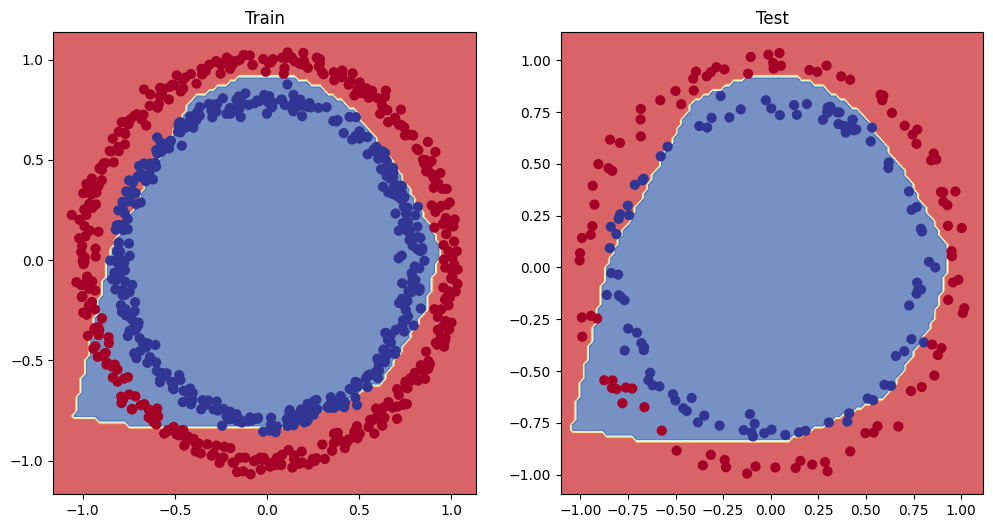

In [53]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

Replicating Non linear activation functions

In [54]:
A=torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

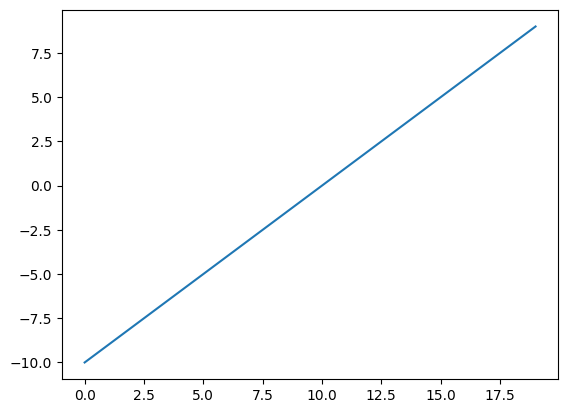

In [55]:
plt.plot(A)

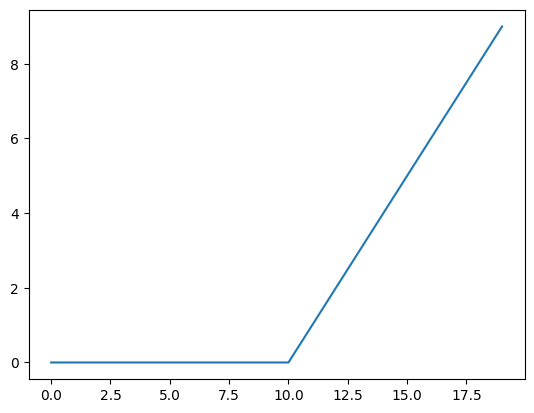

In [56]:
plt.plot(torch.relu(A))

In [57]:
def relu(x:torch.Tensor)->torch.Tensor:
  return torch.maximum(torch.tensor(0),x)
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [58]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

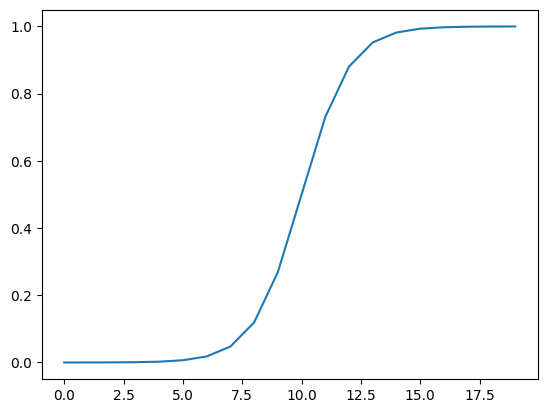

In [59]:
plt.plot(torch.sigmoid(A))

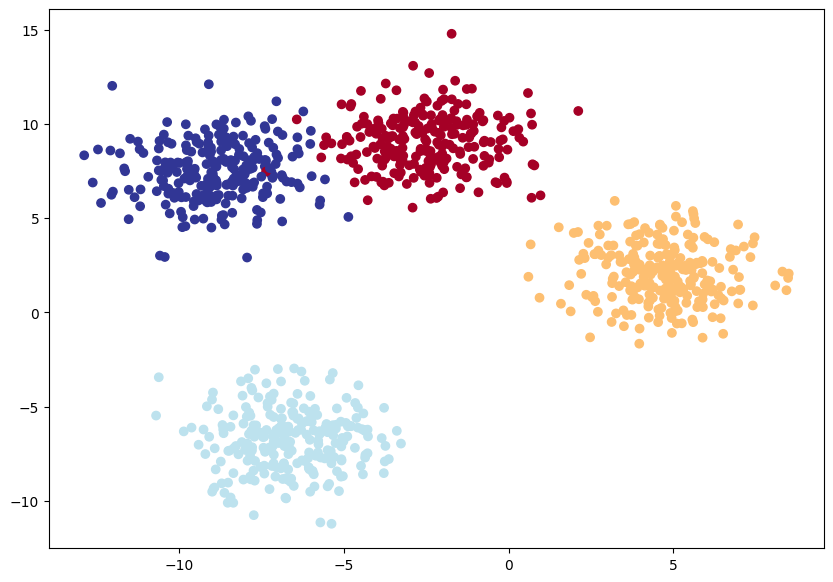

In [60]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

X_blob,y_blob =make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(X_blob,y_blob,
                                                                   test_size=.2,
                                                                   random_state=RANDOM_SEED)

plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)



In [61]:
X_blob_train.shape,y_blob_train.shape,X_blob_test.shape,y_blob_test.shape

(torch.Size([800, 2]),
 torch.Size([800]),
 torch.Size([200, 2]),
 torch.Size([200]))

building a multi-class classification model

In [62]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [63]:
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features,out_features
                  =hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )
  def forward(self,x):
      return self.linear_layer_stack(x)
model_4=BlobModel(input_features=2,
                      output_features=4,
                      hidden_units=8,
                      ).to(device)


In [64]:
X_blob_train.shape,y_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 0., 0., 1.]))

In [65]:
torch.unique(y_blob_train)

tensor([0, 1, 2, 3])

Loss Function and optim for Multi-class classification

In [66]:
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)

prediction probabilities

In [67]:

model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test.to(device))


In [68]:
next(model_4.parameters()).device

device(type='cpu')

In [69]:
y_pred_probs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]])
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]])


In [70]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [71]:
torch.max(y_pred_probs[0])

tensor(0.3244)

In [72]:
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1])

In [73]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

Training and Testing loop

In [74]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100
X_blob_train,y_blob_train=X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test=X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits=model_4(X_blob_train)
  y_pred=torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss=loss_fn(y_logits,y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train,
                  y_pred=y_pred)
  y_blob_train.shape,y_pred.shape
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits=model_4(X_blob_test)
    test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)

    test_loss=loss_fn(test_logits,y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test,
                         y_pred=test_preds)
  if epoch%10==0:
   print(f"Epoch:{epoch}|Loss:{loss}|acc:{acc}|test loss={test_loss}|test acc:{test_acc}")




Epoch:0|Loss:1.1588267087936401|acc:40.375|test loss=1.0755422115325928|test acc:48.0
Epoch:10|Loss:0.6447553038597107|acc:96.75|test loss=0.660687267780304|test acc:97.5
Epoch:20|Loss:0.4253515303134918|acc:98.5|test loss=0.43074119091033936|test acc:100.0
Epoch:30|Loss:0.2529422640800476|acc:99.125|test loss=0.24507610499858856|test acc:99.5
Epoch:40|Loss:0.11232147365808487|acc:99.25|test loss=0.10228512436151505|test acc:99.5
Epoch:50|Loss:0.06626509130001068|acc:99.25|test loss=0.058475371450185776|test acc:99.5
Epoch:60|Loss:0.05068016052246094|acc:99.25|test loss=0.042932283133268356|test acc:99.5
Epoch:70|Loss:0.04299675300717354|acc:99.25|test loss=0.034909654408693314|test acc:99.5
Epoch:80|Loss:0.038361385464668274|acc:99.25|test loss=0.02987821027636528|test acc:99.5
Epoch:90|Loss:0.03524842858314514|acc:99.25|test loss=0.02662651054561138|test acc:99.5


Predict and evaluate

In [75]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(X_blob_test)
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [76]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs=torch.argmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [77]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

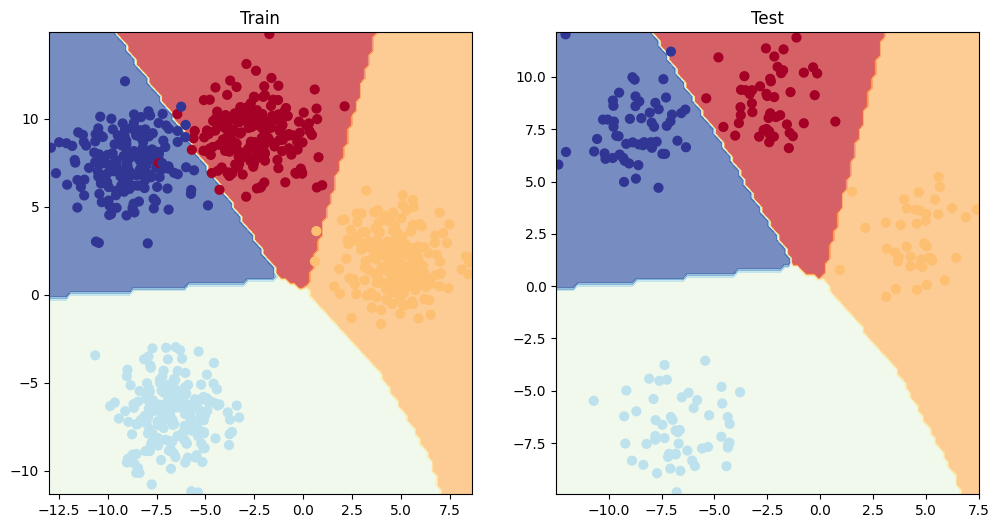

In [78]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

In [81]:
# !pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 47.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [82]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4) .to(device)
torchmetric_accuracy(y_pred_probs, y_blob_test)


tensor(0.9950)